In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../../Titanic/train.csv', encoding='utf-8')
df_test = pd.read_csv('../../Titanic/test.csv', encoding='utf-8')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. 데이터의 결측치를 정리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# age 변수의 결측치는 평군값으로 대체
# deck 는 결측치가 너무 많으므로 drop
# embarked, embarked_town의 경우 2개의 결측치 존재 -> 행 삭제

df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(['Cabin'], axis=1)
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### 2. 각 Feature에 따른 생존률을 계산

In [7]:
def feature_surv(data, feature):
    uni = data[feature].unique().tolist()
    
    result = {}
    for i in uni:
        temp = data[data[feature]==i]['Survived']
        perc_surv = temp.sum()/len(temp)
        result[i] = np.round(perc_surv, 4)
    print(result)
    return result

In [8]:
features = df.columns.tolist()
features = [i for i in features if i not in ['PassengerId', 'Survived', 'Age', 
                                             'Fare', 'Name', 'Ticket']]

for i in features:
    print(i, ': ', end='')
    result = feature_surv(df, i)

Pclass : {3: 0.2424, 1: 0.6262, 2: 0.4728}
Sex : {'male': 0.1889, 'female': 0.7404}
SibSp : {1: 0.5359, 0: 0.3432, 3: 0.25, 4: 0.1667, 2: 0.4643, 5: 0.0, 8: 0.0}
Parch : {0: 0.3417, 1: 0.5508, 2: 0.5, 5: 0.2, 3: 0.6, 4: 0.0, 6: 0.0}
Embarked : {'S': 0.337, 'C': 0.5536, 'Q': 0.3896}


### 2-2. 내용을 도식화

{3: 0.2424, 1: 0.6262, 2: 0.4728}
{'male': 0.1889, 'female': 0.7404}
{1: 0.5359, 0: 0.3432, 3: 0.25, 4: 0.1667, 2: 0.4643, 5: 0.0, 8: 0.0}
{0: 0.3417, 1: 0.5508, 2: 0.5, 5: 0.2, 3: 0.6, 4: 0.0, 6: 0.0}
{'S': 0.337, 'C': 0.5536, 'Q': 0.3896}


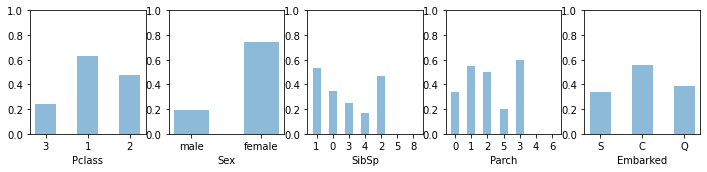

In [15]:
fig, ax = plt.subplots(1,5, figsize=(12,5))

for idx, i in enumerate(features):
    axx = plt.subplot(2,5,idx+1)
    result = feature_surv(df, i)
    axx.bar(np.arange(len(result.keys())), result.values(), width=0.5, alpha=0.5)
    axx.set_xticks(np.arange(len(result.keys())))
    axx.set_xticklabels(result.keys())
    axx.set_xlabel(i)
    axx.set_ylim([0,1])

#     axx.hist(result)

### 2-3. age 변수를 다음과 같이 구분한 후, 생존률을 도식화
- 0~10세 : 0
- 10~20세 : 1
...

In [16]:
age = []

for i in df['Age']:
    if i < 10:
        age.append(0)
    elif i >= 10 and i < 20:
        age.append(10)
    elif i >= 20 and i < 30:
        age.append(20)
    elif i >= 30 and i < 40:
        age.append(30)
    elif i >= 40 and i < 50:
        age.append(40)
    elif i >= 50 and i < 60:
        age.append(50)
    elif i >= 60 and i < 70:
        age.append(60)
    elif i >= 70 and i < 80:
        age.append(70)
    elif i >= 80 and i < 90:
        age.append(80)
        
df['age_new'] = age

age_new
0     0.613
10    0.402
20    0.325
30    0.434
40    0.382
50    0.417
60    0.278
70      NaN
80    1.000
Name: Survived, dtype: float64


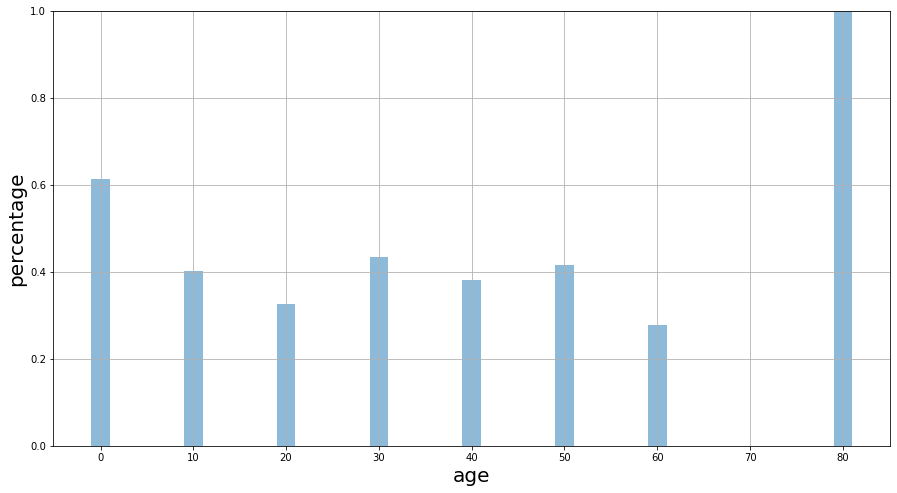

In [18]:
index = [0, 10, 20 ,30 ,40 ,50 ,60 ,70, 80]
surv_perc = df[df['Survived']==1].groupby(['age_new'])['Survived'].count()/df.groupby(['age_new'])['Survived'].count()
# print(df[df['survived']==1].groupby(['age_new'])['survived'].count())
# print(df.groupby(['age_new'])['survived'].count())
print(np.round(surv_perc, 3))
plt.figure(figsize=(15,8))
plt.bar(index, surv_perc, width=2, alpha=0.5)
plt.ylim([0, 1])
plt.xticks(index)
plt.xlabel('age', fontsize=20)
plt.ylabel('percentage', fontsize=20)
plt.grid(True)
plt.show()

### 3. 범주형 변수들을 Label Encoding을 통해 정리

In [ ]:
df

In [ ]:
from sklearn.preprocessing import LabelEncoder

category = ['sex', 'embarked', 'class', 'who', 'adult_male', 'embark_town' , 'alive', 'alone']
enc = LabelEncoder()
for feature in category:
    enc.fit(df[feature])
    print(feature, ':', enc.classes_, end=' => ')
    df[feature] = enc.transform(df[feature])
    print([i for i in range(len(enc.classes_))])
df

### 4.1 생존여부 예측 모델을 생성

In [ ]:
x = df.drop(['survived', 'alive', 'age'], axis=1)
y = df['survived']

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
# ?RandomForestClassifier

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score

params = {'max_depth':[10, 13, 15, 17, 19],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4, 5],
          'max_leaf_nodes': [10, 15, 20]}

model = RandomForestClassifier(random_state=1)
gs = GridSearchCV(model, params, scoring=accuracy_score)
gs.fit(x_train, y_train)

### 4.2 test 데이터셋에 대한 모델 결과를 시각화

In [ ]:
print('best parmas : ', gs.best_params_)
# print('best score : ', gs.best_score_)

best_grid = gs.best_estimator_
y_pred = best_grid.predict(x_test)
train_pred = best_grid.predict(x_train)

print('< train >')
print('roc_auc : ', roc_auc_score(y_train, train_pred))
print('accuracy : ', accuracy_score(y_train, train_pred), '\n')

print('< test >')
print('roc_auc : ', roc_auc_score(y_test, y_pred))
print('accuracy : ', accuracy_score(y_test, y_pred))

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(y_test.index, y_test, label='true', color='blue', width=5)
plt.bar(y_test.index, y_pred, label='pred', color='orange', width=5, alpha=0.5)
plt.legend(loc='upper right')
plt.show()

### 남/녀 탑승객 수를 pclass 1~3등급에 따라 시각화

In [ ]:
bonus = df.groupby(['sex', 'pclass'])['survived'].count()
bonus

In [ ]:
plt.rc('font', family='Malgun Gothic')

index1 = [1, 3]
index2 = [1.5, 3.5]
index3 = [2, 4]

ax, fig = plt.subplots(1,1, figsize=(12,6))
axx = plt.subplot(111)
axx.bar(index1, bonus[:,1], width=0.4, label='pclass 1')
axx.bar(index2, bonus[:,2], width=0.4, label='pclass 2')
axx.bar(index3, bonus[:,3], width=0.4, label='pclass 3')
axx.legend(loc='upper left')

axx.set_xticks(index2)
axx.set_xticklabels(['남', '여'], fontsize=20)